# Symbolic Computations Using SymPy for Magnetic Method of Moment Computations

This notebook is intended to generate reference solutions using sympy symbolic package.  

## Import Libraries 

In [2]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"% plt.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8
Succesfully imported matplotlib.pyplot


## Section 1: One-Dimensional Model
We create reference solutions for one-dimensional MoM computations using symbolic compuations.  

### Section 1.1: Seperate 0<xp<1 and 2<x<3 to Avoid Singularity (Lousy Test?) 
<b>First alternative</b>: first integrate wrt to xp (to obtain the $z$-component of the magnetic vector potential), then differentiate wrt to x (to obtain the y-component of the magnetic flux). 

Note that: we replaced abs(x-xp) by x+xp to obtain an expresssion that can be handled symbolically. 

'vector potential as function of x = '

-2.0*x**0.5 + 2.0*(x + 1)**0.5

'magnetic flux as function of x = '

-1.0*x**(-0.5) + 1.0*(x + 1)**(-0.5)

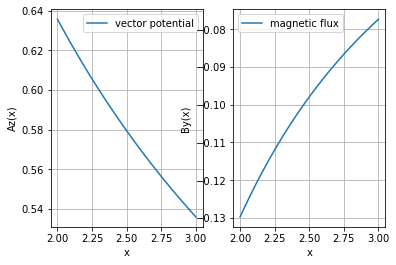

In [29]:
# integrate kernel * magnetization to obtain the vector potential 
# computational domain along the x-axis
# vector potential only has a z-component that depends only on x 
sym.var('x')
sym.var('xp')
kernel1 = pow((x+xp),-1/2)
kernel2 = pow((x+xp),-1) 
magnetization = 1
vp = sym.integrate(kernel1*magnetization, (xp,0,1))
display('vector potential as function of x = ',vp) 

# derive potential wrt to x to obtain the magnetic flux 
bflux = sym.diff(vp,x)
display('magnetic flux as function of x = ',bflux)

#..lambdify the symbolic expressions  
vp_lambda    = sym.lambdify(x, vp)
bflux_lambda = sym.lambdify(x, bflux)

#..sample the lambda expression for the computed solution 
nsamples  = 100 
xvec      = np.linspace(2,3,nsamples)
vp_vec    = vp_lambda(xvec)
bflux_vec = bflux_lambda(xvec) 

#..plot the computed solution 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(xvec, vp_vec, label='vector potential')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Az(x)')
axs[0].legend(loc='best')
axs[0].grid()
axs[1].plot(xvec, bflux_vec, label='magnetic flux')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('By(x)')
axs[1].legend(loc='best')

### Section 2.1: Seperate 0<xp<1 and 2<x<3 to Avoid Singularity: Second Alternative
<b>Second alternative</b>: first differentiate wrt to x (underneath the integral sign to obtain a more involved kernel), then integrate wrt to xp (to obtain the z-component of the magnetic flux). 

Note that: the second alternative fails for the first kernel in the integration wrt x. Unclear why. 

'vector potential as function of x = '

-log(x) + log(x + 1)

'magnetic flux as function of x = '

1/(x + 1) - 1/x

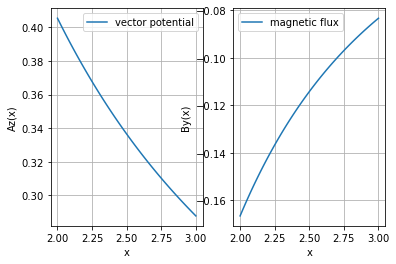

In [43]:
# integrate kernel * magnetization to obtain the vector potential 
# computational domain along the x-axis
# vector potential only has a z-component that depends only on x 
sym.var('x')
sym.var('xp')
kernel1 = pow((x+xp),-1/2)
ddxkernel1 = sym.diff(kernel1,x)
kernel2 = pow((x+xp),-1) 
ddxkernel2 = sym.diff(kernel2,x)
magnetization = 1

# obtain the magnetic flux via integration 
vp = sym.integrate(kernel2*magnetization, (xp,0,1))
display('vector potential as function of x = ',vp) 

# derive potential wrt to x to obtain the magnetic flux 
bflux = sym.integrate(ddxkernel2*magnetization, (xp,0,1))
display('magnetic flux as function of x = ',bflux)

#..lambdify the symbolic expressions  
vp_lambda    = sym.lambdify(x, vp)
bflux_lambda = sym.lambdify(x, bflux)

#..sample the lambda expression for the computed solution 
nsamples  = 100 
xvec      = np.linspace(2,3,nsamples)
vp_vec    = vp_lambda(xvec)
bflux_vec = bflux_lambda(xvec) 

#..plot the computed solution 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(xvec, vp_vec, label='vector potential')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Az(x)')
axs[0].legend(loc='best')
axs[0].grid()
axs[1].plot(xvec, bflux_vec, label='magnetic flux')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('By(x)')
axs[1].legend(loc='best')

In [44]:
ddxkernel1

-0.5*(x + xp)**(-1.5)

In [45]:
bflux = sym.integrate(ddxkernel1, (xp,0,1))
bflux

ValueError: x**w where w is irrational is not defined for negative x

### Section 3.1: Attempts for Other Types of Singularities  

'vector potential as function of x = '

-x*log(-x) + x*log(1 - x)

'magnetic flux as function of x = '

-x/(1 - x) - log(-x) + log(1 - x) - 1

<string>:2: RuntimeWarning: invalid value encountered in log
<string>:2: RuntimeWarning: invalid value encountered in log


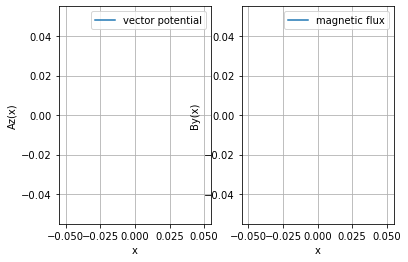

In [50]:
# integrate kernel * magnetization to obtain the vector potential 
# computational domain along the x-axis
# vector potential only has a z-component that depends only on x 
sym.var('x')
sym.var('xp')
kernel = 1/abs(x-xp)
kernel = x/abs(x-xp)
magnetization = 1
vp = sym.integrate(kernel*magnetization, (xp,0,1))
display('vector potential as function of x = ',vp) 

# derive potential wrt to x to obtain the magnetic flux 
bflux = sym.diff(vp,x)
display('magnetic flux as function of x = ',bflux)

#..lambdify the symbolic expressions  
vp_lambda    = sym.lambdify(x, vp)
bflux_lambda = sym.lambdify(x, bflux)

#..sample the lambda expression for the computed solution 
nsamples  = 100 
xvec      = np.linspace(0.25,.75,nsamples)
vp_vec    = vp_lambda(xvec)
bflux_vec = bflux_lambda(xvec) 

#..plot the computed solution 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(xvec, vp_vec, label='vector potential')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Az(x)')
axs[0].legend(loc='best')
axs[0].grid()
axs[1].plot(xvec, bflux_vec, label='magnetic flux')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('By(x)')
axs[1].legend(loc='best')

## Section 2: One-Dimensional Model

In [65]:
sym.var('x')
sym.var('y')
sym.var('xp')
sym.var('yp')
kernel = pow((pow(x-xp,2)+pow(y-yp,2)),-1/2)
magnetization = xp + yp 
vp = sym.integrate(kernel*magnetization, (xp, 0,1), (yp, 0,1))
vp 

Integral((xp + yp)*(x**2 - 2*x*xp + xp**2 + y**2 - 2*y*yp + yp**2)**(-0.5), (xp, 0, 1), (yp, 0, 1))

In [66]:
#..lambdify the symbolic expression 
vp_lambda = sym.lambdify([x,y],vp)

In [67]:
vp_lambda(.5,.5)

ZeroDivisionError: 0.0 cannot be raised to a negative power

## Section 3: One-Dimensional Model

In [ ]:
sym.var('x')
sym.var('y')
sym.var('z')
sym.var('xp')
sym.var('yp')
sym.var('zp')
kernel = pow((pow(x-xp,2)+pow(y-yp,2)+pow(z-zp,2)),-3/2)
magnetization = 1
vp = sym.integrate(kernel*magnetization, (xp, 0,1), (yp, 0,1), (zp, 0,1))
vp 